<a href="https://colab.research.google.com/github/robertocsa/Natural-Language-Processing-NLP-/blob/main/PLN7_Exemplo_simplificado_de_vetorizacao_e_agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tutorial 3 exemplo simplificado de  agrupamento de textos utilizando K-Means**

Base de informações:
As mesmas já utilizadas nos exercícios PLN5 e PLN6

Faremos um experimento de K-Means o mais simples possível, para buscarmos o entendimento de seu funcionamento

**1. Lendo os dados**

***Reading data***

In [ ]:
import os
import pandas as pd
#os.chdir(r'/content/drive/MyDrive/Colab Notebooks/Apres Prog Ling Natural PLN/input/')
#df=pd.read_csv('SumulasSTF.csv',header='infer', sep=";", on_bad_lines='skip')
#df.head(6)
df=pd.DataFrame()
documents=list(['Nadou até o banco localizado do outro lado do rio.',
                'Caminhou até o banco localizado do outro lado do rio, para sacar um cheque.',
                'Foi ao banco sacar um cheque',
                'Nadou bastante para chegar no banco'])
df['corpus']=documents
df

,corpus
0,Nadou até o banco localizado do outro lado do ...
1,Caminhou até o banco localizado do outro lado ...
2,Foi ao banco sacar um cheque
3,Nadou bastante para chegar no banco


**2. Carregando os pacotes (loading packages)**


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   corpus  4 non-null      object
dtypes: object(1)
memory usage: 160.0+ bytes


**Limpeza de Stop-Words e de pontuação**


In [ ]:
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('portuguese')
listaPalavrasComuns=list(['-se','desde','d','l','nº','cabe', 'decisão', 'justiça', 'lei', 'direito', 'ainda', 'pode', 'sobre', 'constituição', 'federal', 'supremo', 'tribunal', 'contra','respectivo', 'poder', 'judiciário','trata', 'art','vi','c'])
listaExclWords=stopwords+listaPalavrasComuns
df_listaExclWords=pd.DataFrame(listaExclWords)
df_listaExclWords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,0
0,a
1,à
2,ao
3,aos
4,aquela
...,...
227,judiciário
228,trata
229,art
230,vi


**Vetorização de sentenças (*embedder encode*) e remoção de stop-words**

In [ ]:
#Lista word é uma lista obtida a partir da concatenação das stop-words da bibliteca NLTK com
# outra lista que elaborei, com palavras que acredito estarem atrapalhando, por serem
# comuns entre vários agrupamentos
vectorizer=TfidfVectorizer(stop_words=listaExclWords)
features=vectorizer.fit_transform(documents)
vv=vectorizer.vocabulary_
#first_words = dict(list(vv.items())[:12])
#first_words
vv.items()

dict_items([('nadou', 7), ('banco', 0), ('localizado', 6), ('outro', 8), ('lado', 5), ('rio', 9), ('caminhou', 2), ('sacar', 10), ('cheque', 4), ('bastante', 1), ('chegar', 3)])

Exibindo o resultado da vetorização de sentenças (embedder encode)

In [ ]:
df_corpus_embeddings=pd.DataFrame(features)
print(df_corpus_embeddings.shape)
df_corpus_embeddings


(4, 1)


,0
0,"(0, 9)\t0.42882143251767496\n (0, 5)\t0.428..."
1,"(0, 4)\t0.35252225909913176\n (0, 10)\t0.35..."
2,"(0, 4)\t0.6404340540779521\n (0, 10)\t0.640..."
3,"(0, 3)\t0.5878376510497553\n (0, 1)\t0.5878..."


**Agrupamento de sentenças (*clusterization*)**

In [ ]:
#Agrupamento
#Clustering
#corpus_embeddings=embedder.encode(corpus2)

k=2
model=KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

df['cluster']=model.labels_
df

,corpus,cluster
0,Nadou até o banco localizado do outro lado do ...,1
1,Caminhou até o banco localizado do outro lado ...,0
2,Foi ao banco sacar um cheque,0
3,Nadou bastante para chegar no banco,1


**Plotando os pontos representativos das sumulas**

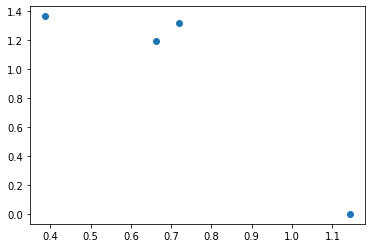

In [ ]:
featTransf=model.fit_transform(features)
plt.scatter(featTransf[:,0], featTransf[:,1])

In [ ]:
def contaItensDoCluster(objClusterAssignmt, clusterAContar):
  conta=0
  for i,elem in enumerate(objClusterAssignmt):
    if(elem==clusterAContar):
      conta+=1
  return conta
cluster_assignment=df['cluster']
print(cluster_assignment)
print("")
contaTotal=0
for i in range (0,k):
  conta=contaItensDoCluster(cluster_assignment, i)
  print("Nr de itens no cluster %2d : %2d" % (i, conta))
  contaTotal+=conta
print("Nr de itens totais: %2d" % (contaTotal))

0    1
1    0
2    0
3    1
Name: cluster, dtype: int32

Nr de itens no cluster  0 :  2
Nr de itens no cluster  1 :  2
Nr de itens totais:  4


**Resultados**

*Results*


In [ ]:
#Resultados
#Results

clustered_sentences=[[] for i in range(k)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
	clustered_sentences[cluster_id].append(documents[sentence_id])

print(len(clustered_sentences))

for i, cluster in enumerate(clustered_sentences):
  print("Cluster ", i+1)
  for j, item in enumerate(cluster):
    if (j>4):
      break
    print(item)
    print("")

2
Cluster  1
Caminhou até o banco localizado do outro lado do rio, para sacar um cheque.

Foi ao banco sacar um cheque

Cluster  2
Nadou até o banco localizado do outro lado do rio.

Nadou bastante para chegar no banco



**Apresentando as nuvens de palavras**

*Word clouds*

('banco', 2)('sacar', 2)('cheque', 2)('Caminhou', 1)('localizado', 1)
('Nadou', 2)('banco', 2)('localizado', 1)('outro', 1)('lado', 1)


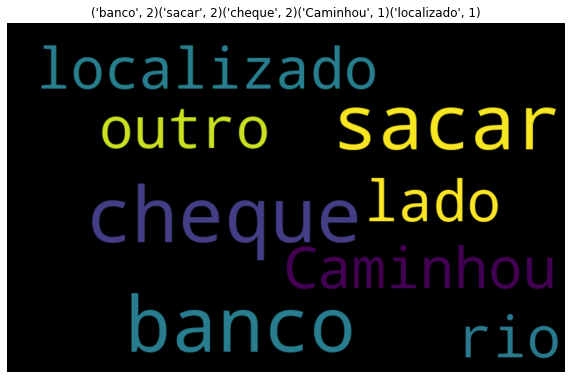

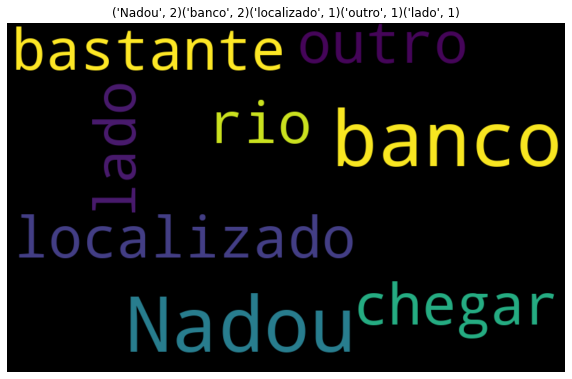

In [ ]:
#Nuvem de palavras
#Word Cloud
from wordcloud import WordCloud

def criaDicFreqs(wordcloud, text):
  # create a dictionary of word frequencies
  text_dictionary = wordcloud.process_text(text)
  # sort the dictionary
  word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

  #use words_ to print relative word frequencies
  rel_freq=wordcloud.words_

  #return results
  strRetorno=list(word_freq.items())[:5]
  strRetorno=''.join(str(e) for e in strRetorno)
  return(strRetorno)

def word_cloud(pred_df, label):
  wc=' '.join([text for text in pred_df['corpus'][pred_df['cluster'] == label]])
  # create the instance only once and add stopwords
  stopwords2 = set(stopwords)

  #create the wordcloud object
  wordcloud=WordCloud(stopwords=stopwords2,
                      width=800, height=500,
                      random_state=21,
                      max_font_size=110).generate(wc)
  listaFreqWords=criaDicFreqs(wordcloud, wc)
  print(listaFreqWords)
  fig=plt.figure(figsize=(10,7))
  plt.imshow(wordcloud, interpolation="bilinear")
  # displaying the title
  plt.title(listaFreqWords)
  plt.axis('off')

for i in range(0,k):
  word_cloud(df,i)


In [ ]:
df_group=df.groupby('cluster')
df_group.groups

{0: [1, 2], 1: [0, 3]}

In [ ]:
writePath=r'sumulas do stf agrupadas por assunto.csv'
df.to_csv(writePath, header=True, index=None, sep=',', mode='w')
print("Faça o download em '\input'")

Faça o download em '\input'


In [ ]:
df

,corpus,cluster
0,Nadou até o banco localizado do outro lado do ...,1
1,Caminhou até o banco localizado do outro lado ...,0
2,Foi ao banco sacar um cheque,0
3,Nadou bastante para chegar no banco,1


In [ ]:
print("Cluster centroids: \n")
order_centroids=model.cluster_centers_.argsort()[:,::-1]
terms=vectorizer.get_feature_names()

for i in range(k):
	print("Cluster %d: " % i)
	for j in order_centroids[i, :10]:
		print(' %s' % terms[j])
	print('------')

Cluster centroids: 

Cluster 0: 
 sacar
 cheque
 banco
 rio
 outro
 localizado
 lado
 caminhou
 nadou
 chegar
------
Cluster 1: 
 chegar
 bastante
 nadou
 banco
 sacar
 rio
 outro
 localizado
 lado
 cheque
------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
